this is going to predict which state a person is living in

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('urbanization-census-tract.csv')
df.head()

,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex
0,1,Alabama,G0100010020100,32.47718,-86.49007,1845,44076.0,10.69367
1,1,Alabama,G0100010020200,32.47425,-86.47337,2172,43008.0,10.66914
2,1,Alabama,G0100010020300,32.47543,-86.46019,3385,38987.0,10.57098
3,1,Alabama,G0100010020400,32.47200,-86.44363,4267,43131.0,10.67200
4,1,Alabama,G0100010020500,32.45883,-86.42266,9965,43131.0,10.67200


data preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73280 entries, 0 to 73279
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   statefips        73280 non-null  int64  
 1   state            73280 non-null  object 
 2   gisjoin          73280 non-null  object 
 3   lat_tract        73280 non-null  float64
 4   long_tract       73280 non-null  float64
 5   population       73280 non-null  int64  
 6   adj_radiuspop_5  73280 non-null  float64
 7   urbanindex       73280 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 4.5+ MB


/home/derrick-shibero/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='population', ylabel='Density'>

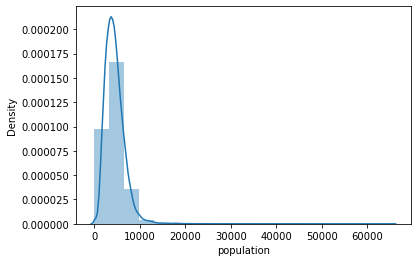

In [3]:
sns.distplot(df.population, bins=20)

outlier detection and removal

/home/derrick-shibero/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='population', ylabel='Density'>

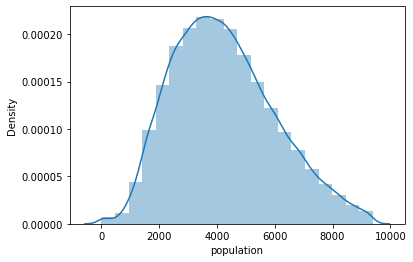

In [4]:
Q1 = np.percentile(df.population, 25, axis=0)
Q3 = np.percentile(df.population, 75, axis=0)
IQR = Q3 - Q1 # getting the interquatile range of the data

upperlimit = Q3 + IQR * 1.5
lowerlimit = Q1 - IQR* 1.5
df_nooutlier = df[(df.population < upperlimit) & (df.population > lowerlimit)]
sns.distplot(df_nooutlier.population, bins=20)

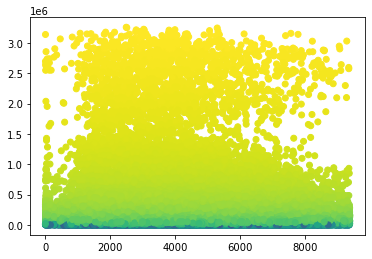

In [5]:
plt.scatter(df_nooutlier.population, df_nooutlier.adj_radiuspop_5, c=df_nooutlier.urbanindex, cmap='viridis')

/home/derrick-shibero/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adj_radiuspop_5', ylabel='Density'>

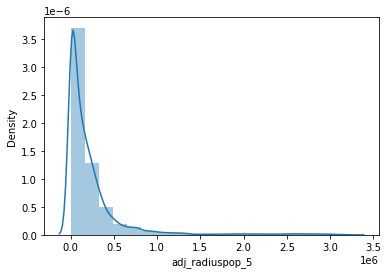

In [6]:
sns.distplot(df_nooutlier.adj_radiuspop_5, bins=20)

In [7]:
df_nooutlier['z_score'] = (df_nooutlier.adj_radiuspop_5 - df_nooutlier.adj_radiuspop_5.mean())/df_nooutlier.adj_radiuspop_5.std()
df_nooutlier.head()

/tmp/ipykernel_2745/2105467487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nooutlier['z_score'] = (df_nooutlier.adj_radiuspop_5 - df_nooutlier.adj_radiuspop_5.mean())/df_nooutlier.adj_radiuspop_5.std()


,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex,z_score
0,1,Alabama,G0100010020100,32.47718,-86.49007,1845,44076.0,10.69367,-0.462319
1,1,Alabama,G0100010020200,32.47425,-86.47337,2172,43008.0,10.66914,-0.464955
2,1,Alabama,G0100010020300,32.47543,-86.46019,3385,38987.0,10.57098,-0.474879
3,1,Alabama,G0100010020400,32.47200,-86.44363,4267,43131.0,10.67200,-0.464652
5,1,Alabama,G0100010020600,32.44254,-86.47874,3620,34588.0,10.45126,-0.485736


/home/derrick-shibero/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z_score', ylabel='Density'>

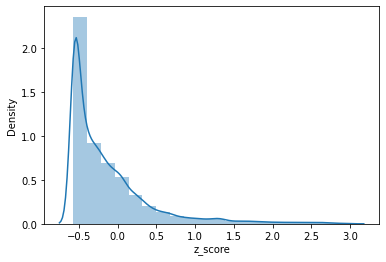

In [8]:
df_nooutlier_out = df_nooutlier[df_nooutlier.z_score < 3]
sns.distplot(df_nooutlier_out.z_score,bins=20)

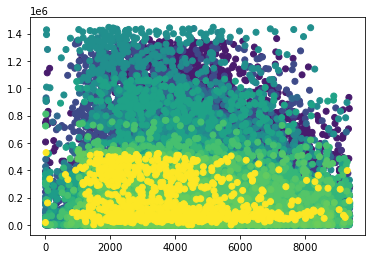

In [9]:
plt.scatter(df_nooutlier_out.population, df_nooutlier_out.adj_radiuspop_5, c=df_nooutlier_out.statefips, cmap='viridis')

In [10]:
from sklearn.preprocessing import LabelEncoder
labeller = LabelEncoder()
df_nooutlier_out.gisjoin = labeller.fit_transform(df_nooutlier_out.gisjoin)

/tmp/ipykernel_2745/1891145562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nooutlier_out.gisjoin = labeller.fit_transform(df_nooutlier_out.gisjoin)


In [11]:
df_nooutlier_out.head()

,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex,z_score
0,1,Alabama,0,32.47718,-86.49007,1845,44076.0,10.69367,-0.462319
1,1,Alabama,1,32.47425,-86.47337,2172,43008.0,10.66914,-0.464955
2,1,Alabama,2,32.47543,-86.46019,3385,38987.0,10.57098,-0.474879
3,1,Alabama,3,32.47200,-86.44363,4267,43131.0,10.67200,-0.464652
5,1,Alabama,4,32.44254,-86.47874,3620,34588.0,10.45126,-0.485736


modelling

In [12]:
from sklearn.model_selection import train_test_split
X = df_nooutlier_out.drop(['urbanindex','gisjoin','state','z_score'], axis=1)
y = df_nooutlier_out.urbanindex
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

naive = LinearRegression()
ensemles = RandomForestRegressor()
neighbour = KNeighborsRegressor()

models = [naive, ensemles, neighbour]

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = mean_absolute_error(y_test, y_pred)
    accuracy1 = r2_score(y_test, y_pred)
    print(f'{model} : {accuracy} {accuracy1}')

LinearRegression() : 1.1470818354663905 0.4949625543876607
RandomForestRegressor() : 0.0005120298033982667 0.9999910984998623
KNeighborsRegressor() : 0.007433335385261551 0.9991104140626259


In [15]:
import pickle
pickle.dump(ensemles, open('model.pkl', 'wb'))